## LS - Machine learning 

##### Name : Sarvesh Patil(22b2276)

# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [37]:
\
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Input,models,layers
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [38]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    r'D:\code\Learners space\Week 3\Data',
    labels='inferred',
    label_mode='categorical',
    class_names=['Cheetah','Crocodile','Elephants','Tiger'],
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True
)

Found 1658 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [39]:
data_iterator=data.as_numpy_iterator()

In [40]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

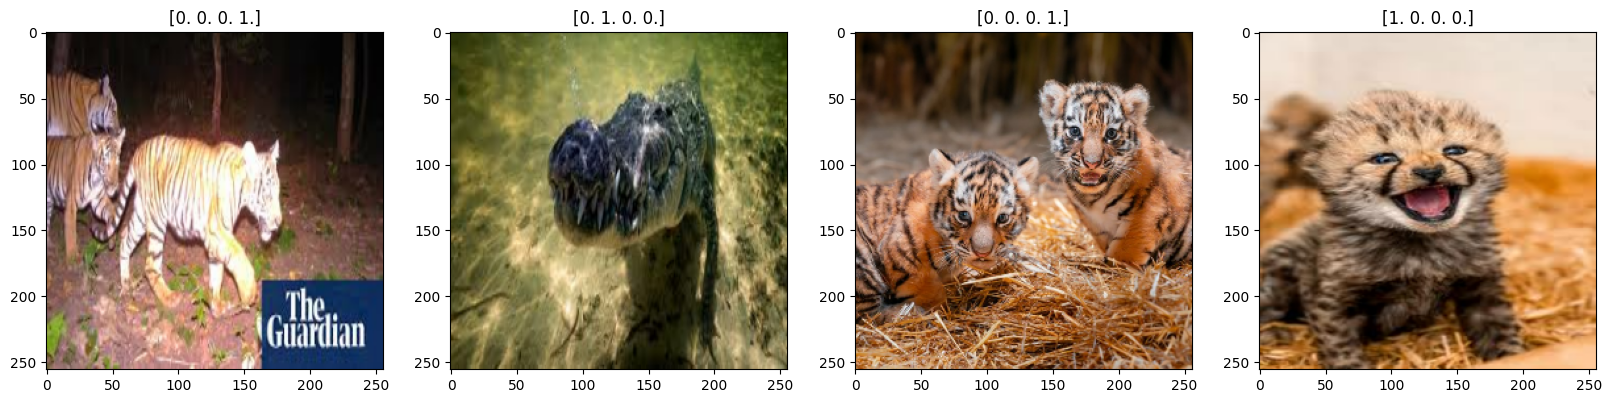

In [41]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [42]:
data=data.map(lambda image, label: (tf.cast(image, tf.float32) / 255.0, label))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [43]:
train_data = data.skip(8)
test_data = data.take(8)
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [44]:
from tensorflow.keras import layers, models

model = models.Sequential([
    # Convolutional layer with 32 filters, kernel size 3x3, ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    # MaxPooling layer with pool size 2x2
    layers.MaxPooling2D((2, 2)),
    # Dropout layer
    layers.Dropout(0.25),
    
    # Second convolutional layer with 64 filters
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Second MaxPooling layer
    layers.MaxPooling2D((2, 2)),
    # Dropout layer
    layers.Dropout(0.25),
    
    # Third convolutional layer with 128 filters
    layers.Conv2D(128, (3, 3), activation='relu'),
    # Third MaxPooling layer
    layers.MaxPooling2D((2, 2)),
    # Dropout layer
    layers.Dropout(0.25),
    
    # Fourth convolutional layer with 128 filters
    layers.Conv2D(128, (3, 3), activation='relu'),
    # Fourth MaxPooling layer
    layers.MaxPooling2D((2, 2)),
    # Dropout layer
    layers.Dropout(0.25),
    
    # Flatten layer to convert 3D outputs to 1D
    layers.Flatten(),
    
    # Fully connected Dense layer with 512 units
    layers.Dense(512, activation='relu'),
    # Dropout layer
    layers.Dropout(0.5),
    
    # Output Dense layer with 4 units (for the 4 classes), using softmax activation
    layers.Dense(4, activation='softmax')
])


C:\Users\psarv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


**Q.6** Compile your model

In [45]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy', # use tf.keras.losses._______(from_logits = False)  
              metrics = ['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [47]:
model.fit(train_data,
          epochs = 50,
          batch_size = 32,
          verbose=1,
          validation_data = test_data)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 29s 568ms/step - accuracy: 0.2952 - loss: 1.3810 - val_accuracy: 0.3047 - val_loss: 1.3568
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 28s 647ms/step - accuracy: 0.2638 - loss: 1.4091 - val_accuracy: 0.3164 - val_loss: 1.3697
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 589ms/step - accuracy: 0.2796 - loss: 1.3718 - val_accuracy: 0.3164 - val_loss: 1.3405
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 552ms/step - accuracy: 0.3466 - loss: 1.3536 - val_accuracy: 0.3086 - val_loss: 1.3330
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 566ms/step - accuracy: 0.3968 - loss: 1.2906 - val_accuracy: 0.3320 - val_loss: 1.2789
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 25s 560ms/step - accuracy: 0.4609 - loss: 1.2020 - val_accuracy: 0.5039 - val_loss: 1.1954
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 582ms/step - accuracy: 0.4734 - loss: 1.1728 - val_accuracy: 0.5742 - val_loss: 1.0444
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 26s 597ms/step - accuracy: 0.5449 - loss: 1.0703 - val_accu

KeyboardInterrupt: 

**Q.8** Test your code with test set

In [48]:
loss,accuracy=model.evaluate(test_data)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.8707 - loss: 0.6635


In [49]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.875


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**